In [43]:
import torch

# Dataset
The first object to manage data with torch is Dataset.
Start by creating some data, we need input data and labels.

In [44]:
train_input = torch.rand(1000, 10, 10)
train_labels = torch.rand(1000, 2)

The tensor dataset is the simplest dataset type, it take two tensor as imput that have and equal size of first dimention.

In [45]:
dataset = torch.utils.data.TensorDataset(train_input, train_labels)

The dataset object is iterable

In [46]:
x, y = dataset.__getitem__(0)
print(x.shape, y.shape)

for x, y in dataset:
  print(x.shape, y.shape)
  break

torch.Size([10, 10]) torch.Size([2])
torch.Size([10, 10]) torch.Size([2])


# Implement custom Dataset
We implement a dataset that get two tensors x and y and return the values.
To implement a custom dataset we need to extend Dataset and implement `__len__` and `__getitem__`: the first return the numbers of item, instead the second return the item `i`.

In [47]:
class ToyDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        assert x.shape[0] == y.shape[0]
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [48]:
dataset = ToyDataset(train_input, train_labels)
x, y = dataset.__getitem__(0)
print(x.shape, y.shape)

for x, y in dataset:
  print(x.shape, y.shape)
  break

torch.Size([10, 10]) torch.Size([2])
torch.Size([10, 10]) torch.Size([2])


Remember that the return of `__getitem__` it a tuple of tensor, the tensor should be of the same shape for each element `i`.

# Dataloader
The Dataloader is used to receive a batch of examples instead of one example only. If we create a correct Dataset object we do not need to modify the Dataloader object.

In [49]:
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=15
)

for x, y in dataloader:
  print(x.shape, y.shape)
  break

torch.Size([15, 10, 10]) torch.Size([15, 2])


# Sampler
Is not a good idea to get the data in the reading order, because you could get into a sequence of batch only one class so the model learn to ignore the presence of others so the dataloader can use also a Sampler, for example RandomSampler.

In [72]:
dataset = torch.utils.data.TensorDataset(torch.tensor([[1,1], [2,2], [3,3], [4,4], [5,5]]),torch.tensor([[1],[1],[2],[2],[3]]) )

dataloader = torch.utils.data.DataLoader(
        dataset,
        sampler=torch.utils.data.RandomSampler(dataset),
        batch_size=2
)

for epoch in range(4):
  print(f'epoch {epoch}')
  for batch, (x, y) in enumerate(dataloader):
    print(f'\tbatch {batch}')
    print('\t\t', x)
    print('\t\t', y)

epoch 0
	batch 0
		 tensor([[2, 2],
        [4, 4]])
		 tensor([[1],
        [2]])
	batch 1
		 tensor([[3, 3],
        [1, 1]])
		 tensor([[2],
        [1]])
	batch 2
		 tensor([[5, 5]])
		 tensor([[3]])
epoch 1
	batch 0
		 tensor([[3, 3],
        [2, 2]])
		 tensor([[2],
        [1]])
	batch 1
		 tensor([[4, 4],
        [1, 1]])
		 tensor([[2],
        [1]])
	batch 2
		 tensor([[5, 5]])
		 tensor([[3]])
epoch 2
	batch 0
		 tensor([[5, 5],
        [4, 4]])
		 tensor([[3],
        [2]])
	batch 1
		 tensor([[3, 3],
        [2, 2]])
		 tensor([[2],
        [1]])
	batch 2
		 tensor([[1, 1]])
		 tensor([[1]])
epoch 3
	batch 0
		 tensor([[3, 3],
        [1, 1]])
		 tensor([[2],
        [1]])
	batch 1
		 tensor([[4, 4],
        [5, 5]])
		 tensor([[2],
        [3]])
	batch 2
		 tensor([[2, 2]])
		 tensor([[1]])


We can write our ReverseSampler that get the example in reverse order. We need to create a class that exted Sampler, implement the method `__len__`and the method `__iter__` that return an iterator with the indexes of the example in the favourite order. For example can be used to equilibrate the batch by class or to implement other situation.

In [51]:
class ReverseSampler(torch.utils.data.Sampler):
  def __init__(self, data_source):
      self.data_source = data_source

  def __iter__(self):
      return iter(reversed(range(len(self.data_source))))

  def __len__(self):
      return len(self.data_source)

dataloader = torch.utils.data.DataLoader(
        dataset,
        sampler=ReverseSampler(dataset),
        batch_size=2
)

for epoch in range(4):
  print(f'epoch {epoch}')
  for batch, (x, y) in enumerate(dataloader):
    print(f'\tbatch {batch}')
    print('\t\t', x)
    print('\t\t', y)

epoch 0
	batch 0
		 tensor([[5, 5],
        [4, 4]])
		 tensor([[3],
        [2]])
	batch 1
		 tensor([[3, 3],
        [2, 2]])
		 tensor([[2],
        [1]])
	batch 2
		 tensor([[1, 1]])
		 tensor([[1]])
epoch 1
	batch 0
		 tensor([[5, 5],
        [4, 4]])
		 tensor([[3],
        [2]])
	batch 1
		 tensor([[3, 3],
        [2, 2]])
		 tensor([[2],
        [1]])
	batch 2
		 tensor([[1, 1]])
		 tensor([[1]])
epoch 2
	batch 0
		 tensor([[5, 5],
        [4, 4]])
		 tensor([[3],
        [2]])
	batch 1
		 tensor([[3, 3],
        [2, 2]])
		 tensor([[2],
        [1]])
	batch 2
		 tensor([[1, 1]])
		 tensor([[1]])
epoch 3
	batch 0
		 tensor([[5, 5],
        [4, 4]])
		 tensor([[3],
        [2]])
	batch 1
		 tensor([[3, 3],
        [2, 2]])
		 tensor([[2],
        [1]])
	batch 2
		 tensor([[1, 1]])
		 tensor([[1]])


# Image Dataset
To work with images torchvision is a natural choice if you use pytorch. I have also some simple dataset just ready for download, we will use FashionMnist for our example.

In [52]:
import torchvision
dataset_path = 'datasets'
train_dataset = torchvision.datasets.FashionMNIST(dataset_path, transform=torchvision.transforms.ToTensor(), train=True, download=True)
test_dataset  = torchvision.datasets.FashionMNIST(dataset_path, transform=torchvision.transforms.ToTensor(), train=False, download=True)

In [53]:
print(len(train_dataset)) #60000
print(len(test_dataset)) #10000

60000
10000


In [54]:
labels_map = {0: "T-Shirt",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",
              6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle Boot"}

In [55]:
import matplotlib.pyplot as plt

torch.Size([1, 28, 28])


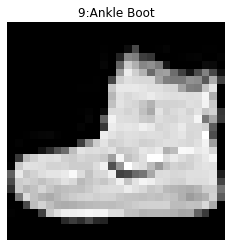

In [56]:
img, label = train_dataset[0]
print(img.shape)
plt.title(f'{label}:{labels_map[label]}')
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Obviously you can use the dataloader to divide in batch also that dataset

In [57]:
train_dataloader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=15
)
test_dataloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=15
)

In [58]:
for img, label in train_dataloader:
  print(img.shape, label.shape)
  break
for img, label in test_dataloader:
  print(img.shape, label.shape)
  break

torch.Size([15, 1, 28, 28]) torch.Size([15])
torch.Size([15, 1, 28, 28]) torch.Size([15])


# Basic Preprocessing & Augmentation
When we import the dataset we also need some preprocessing like scaling and transform PIL Image to tensor and some data augmentation like horizontal flip.

In [59]:
from PIL import Image

In [60]:
transform_train = torchvision.transforms.Compose([
        torchvision.transforms.Resize((32, 32), Image.BILINEAR),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
])

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:288: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [61]:
test_dataset  = torchvision.datasets.FashionMNIST(dataset_path, transform=transform_train, train=False, download=True)

If we run many times we will see that sometimes it is horizontal flip.

torch.Size([1, 32, 32])


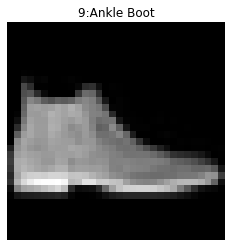

In [80]:
img, label = test_dataset[0]
print(img.shape)
plt.title(f'{label}:{labels_map[label]}')
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

To implement a custom transforms we just need to create an object with `__call__` implemented

In [63]:
# from https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'label': torch.from_numpy(label)}

# Augmentation also for labels
For the case of images as output (like segmentation problems or similar), the augmentation like rotation must made also on the labels.for example albumentation dot that.

In [64]:
!pip install albumentations

We can download an example image.

In [84]:
!wget https://www.crashdown.it/wp-content/uploads/2013/04/pappagallo.jpg
Image.open('pappagallo.jpg')

--2022-02-02 15:00:46--  https://www.crashdown.it/wp-content/uploads/2013/04/pappagallo.jpg
Resolving www.crashdown.it (www.crashdown.it)... 104.21.34.27, 172.67.196.190, 2606:4700:3034::6815:221b, ...
Connecting to www.crashdown.it (www.crashdown.it)|104.21.34.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42410 (41K) [image/jpeg]
Saving to: ‘pappagallo.jpg.5’

pappagallo.jpg.5    100%[===================>]  41.42K  --.-KB/s    in 0s      

2022-02-02 15:00:46 (124 MB/s) - ‘pappagallo.jpg.5’ saved [42410/42410]



We can random crop the image as data augmentation, we can HorizontalFlip and Change Brightnes and Contrast randomly with a certain probability.

In [66]:
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("pappagallo.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In our simple case we use the same image as mask but it can be a segmentation mask or any other kind of image

In [91]:
# Augment an image
transformed = transform(image=image, mask=image)
transformed_image = transformed["image"]

plt.title('Augmented Img')
plt.axis("off")
plt.imshow(transformed["image"].squeeze())
plt.show()

plt.title('Augmented Mask')
plt.axis("off")
plt.imshow(transformed["mask"].squeeze())
plt.show()